In [199]:
# Anomaly Detection using Insider Threat Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix

# Load the data
df = pd.read_csv('cat_daily.csv')

In [200]:
df.head()

,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation
0,Aaden,1,Software Engineer,17,28,5,16.0,8,13,7,2,0,4,-1
1,Oscar,2,Software Engineer,43,0,12,12.0,3,17,0,7,0,6,1
2,Aarav,3,Software Engineer,59,1,11,0.0,3,14,6,3,0,3,1
3,Amber,4,Software Engineer,44,2,12,28.0,5,2,0,7,0,0,1
4,Aaron,5,Software Engineer,49,0,16,10.0,2,16,2,5,0,0,1


In [201]:
df.role.value_counts()

Security Engineer                 224
Software Engineer                 222
Frequency Transmission Systems    136
Project Manager                   135
Intelligence Officer              134
Designer                           44
Name: role, dtype: int64

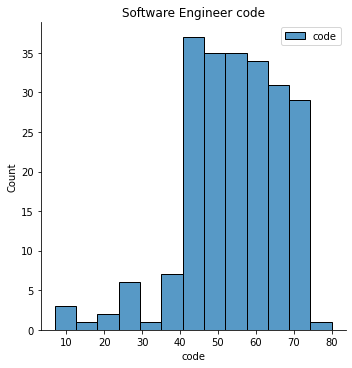

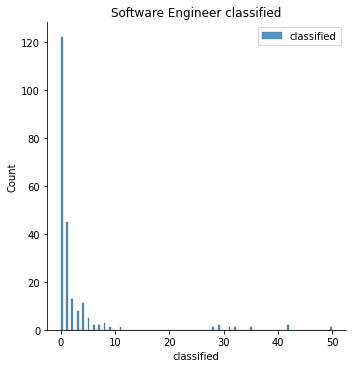

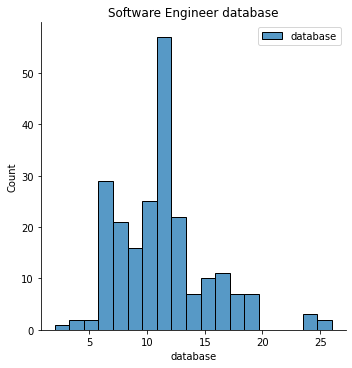

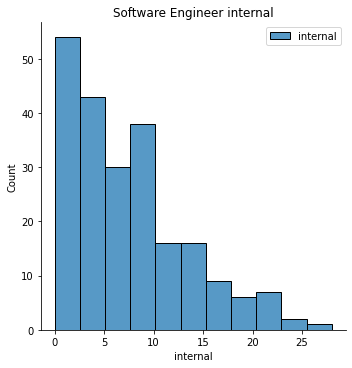

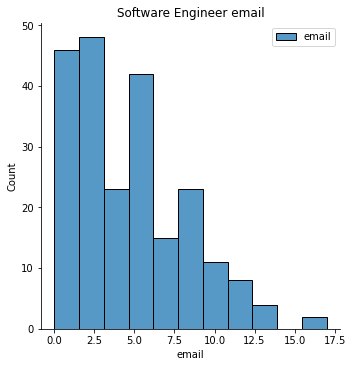

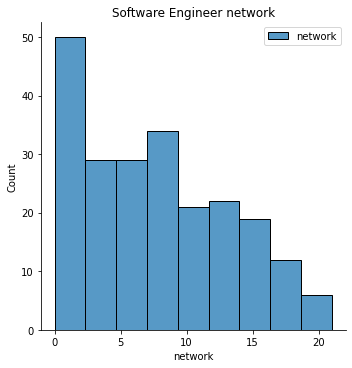

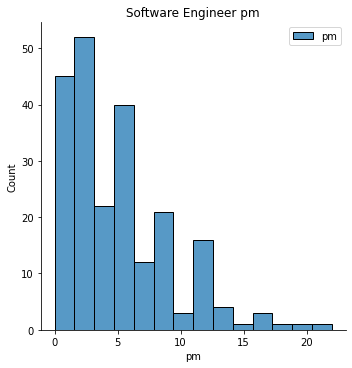

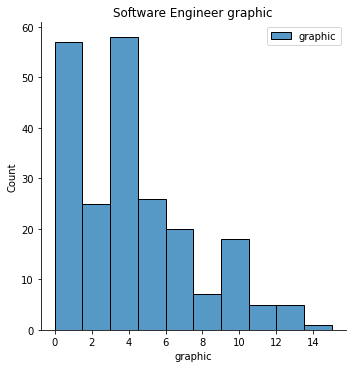

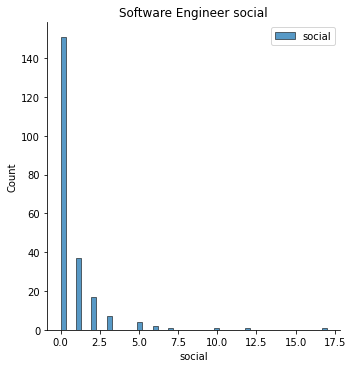

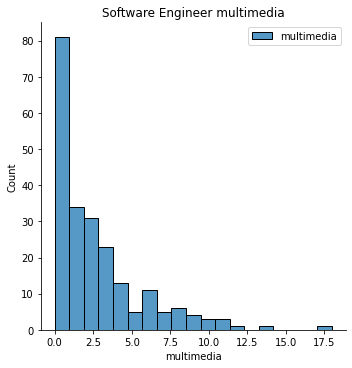

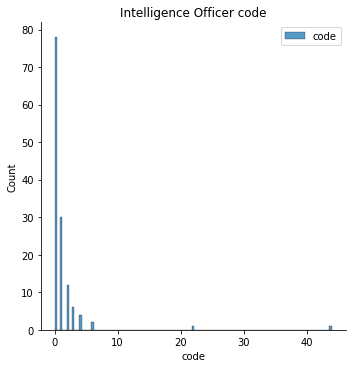

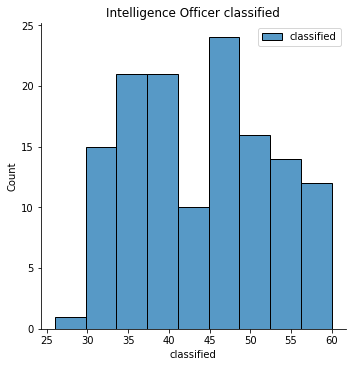

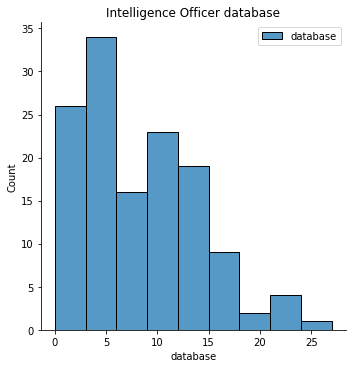

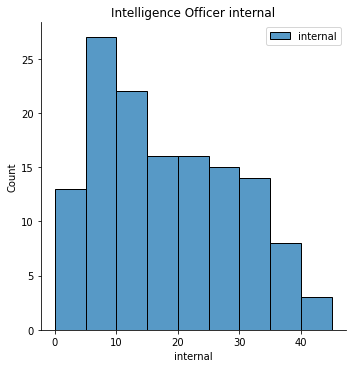

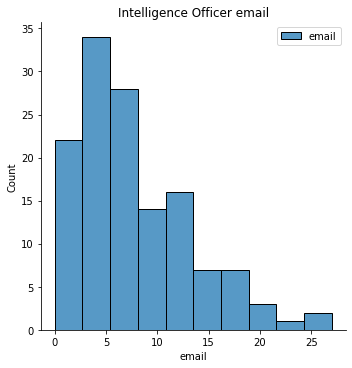

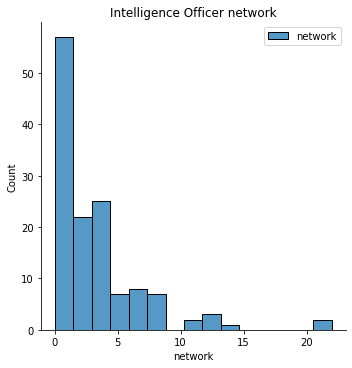

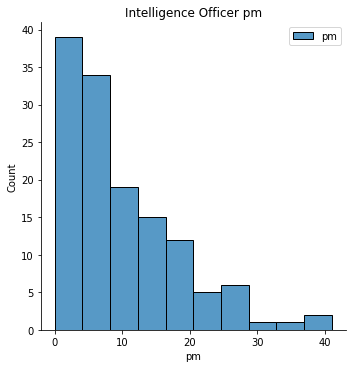

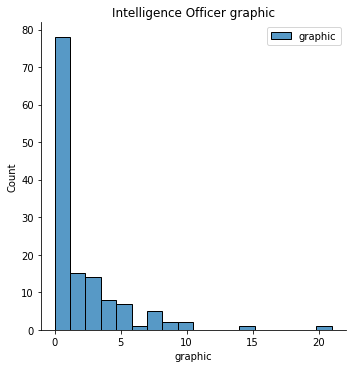

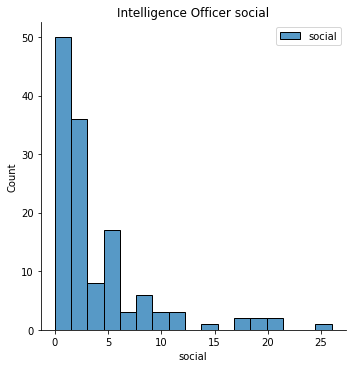

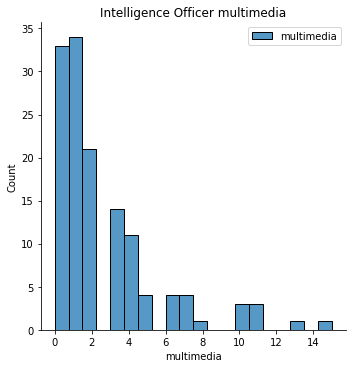

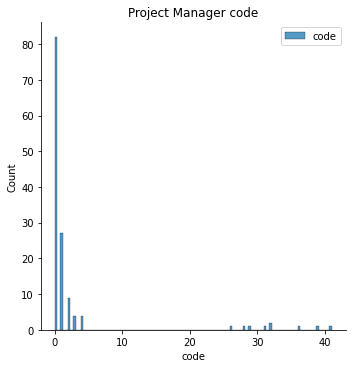

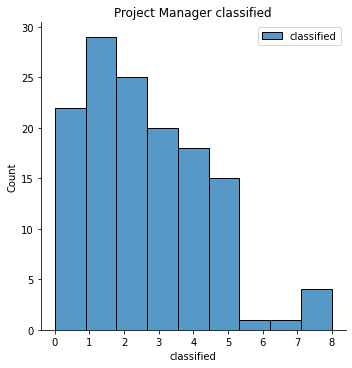

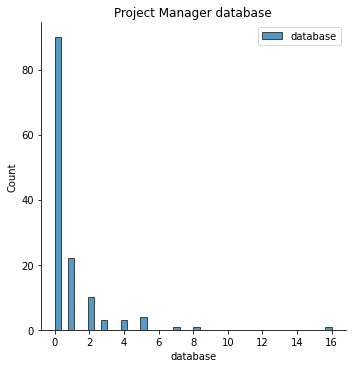

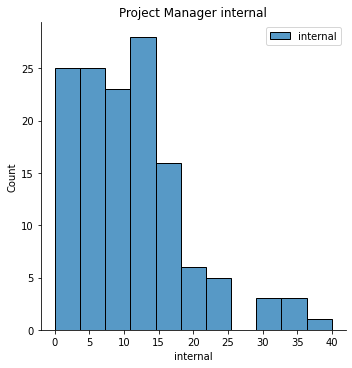

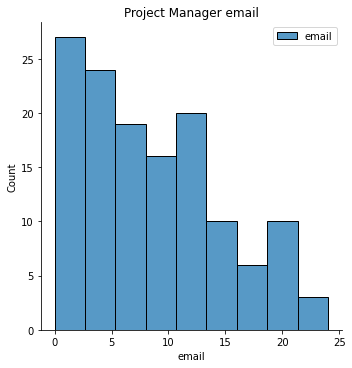

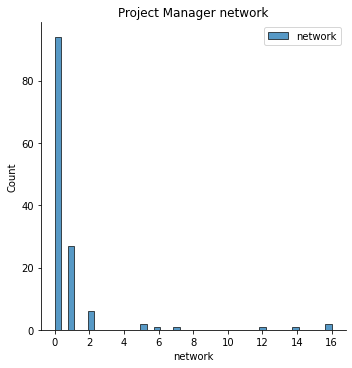

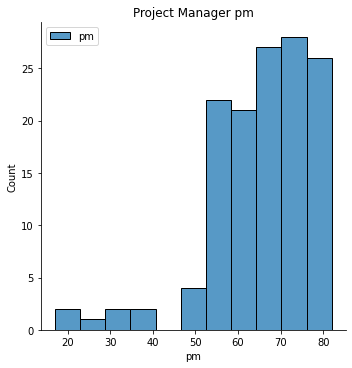

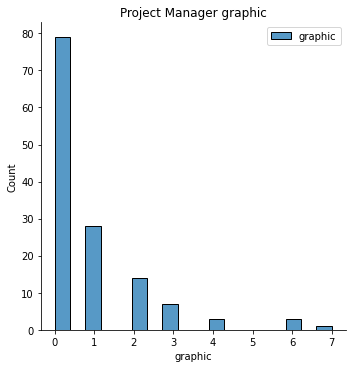

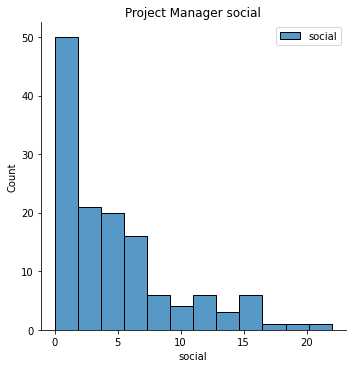

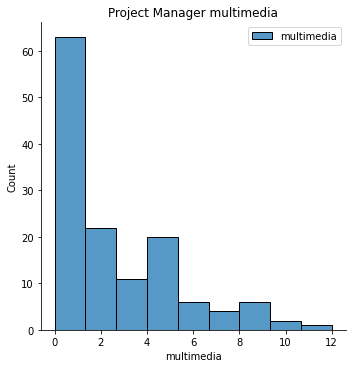

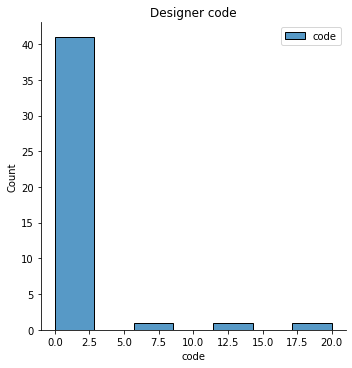

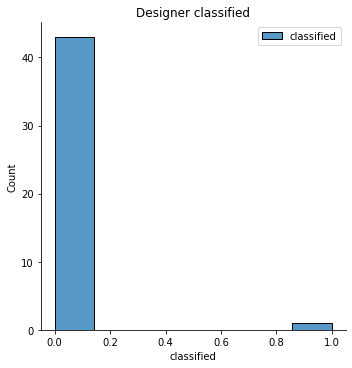

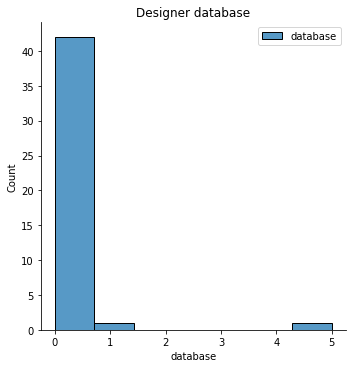

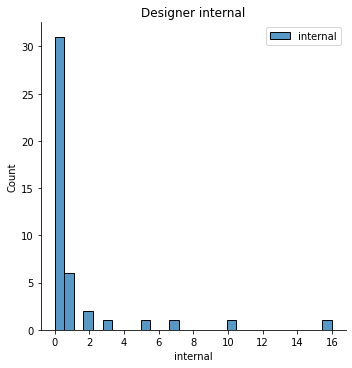

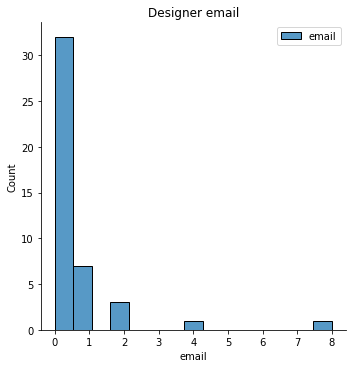

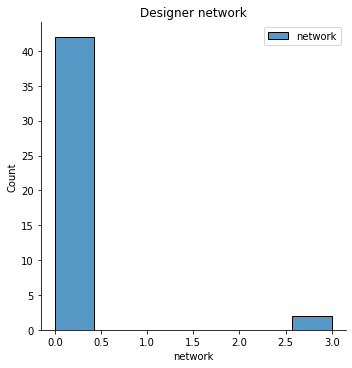

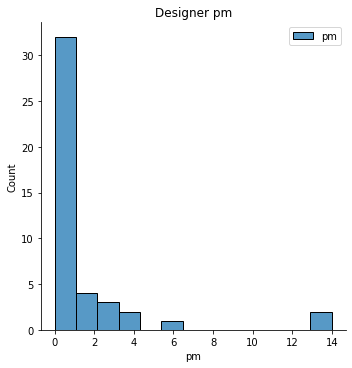

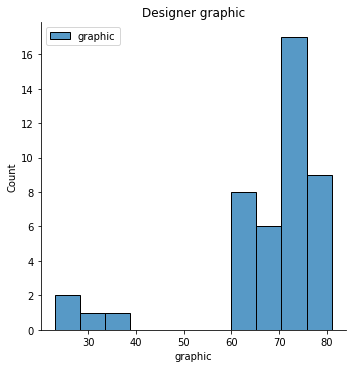

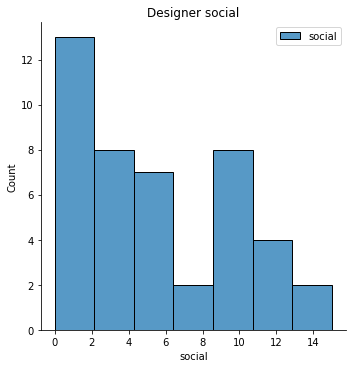

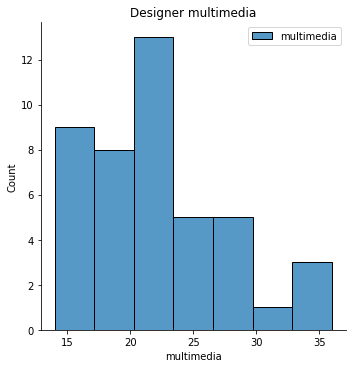

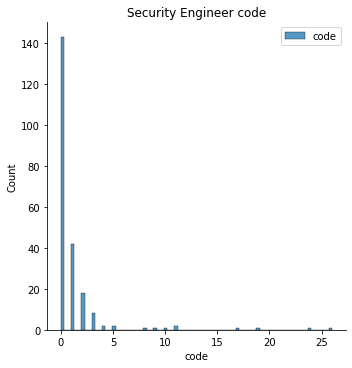

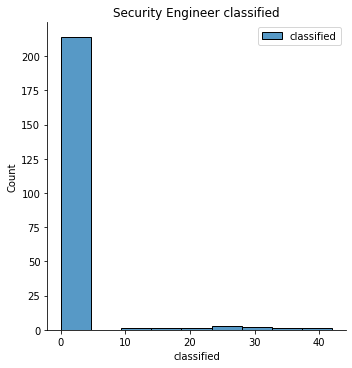

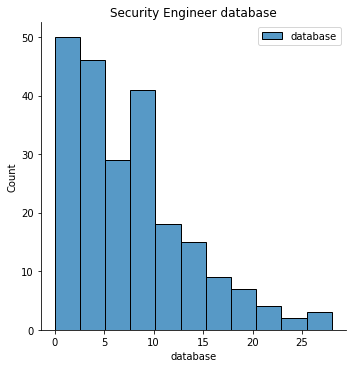

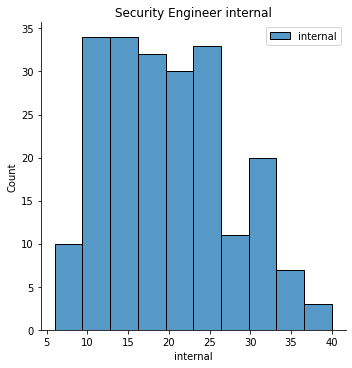

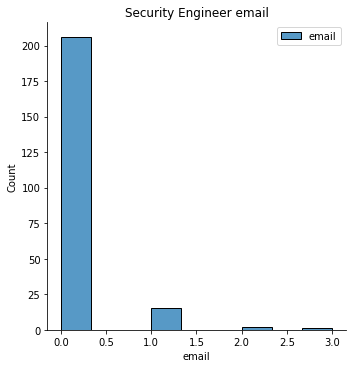

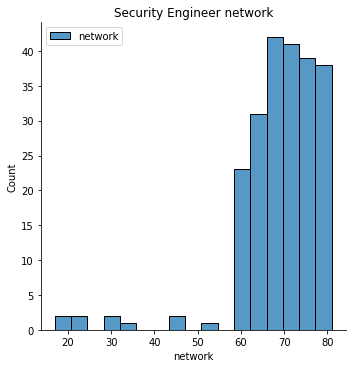

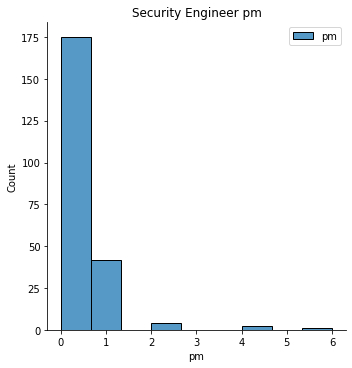

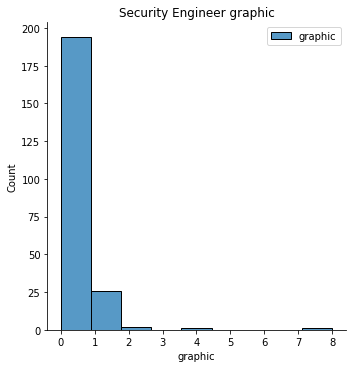

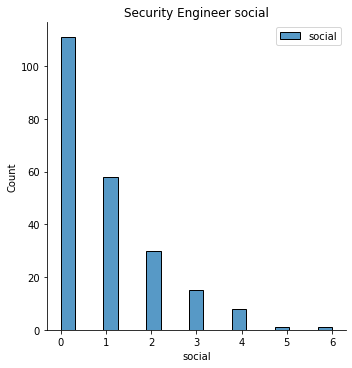

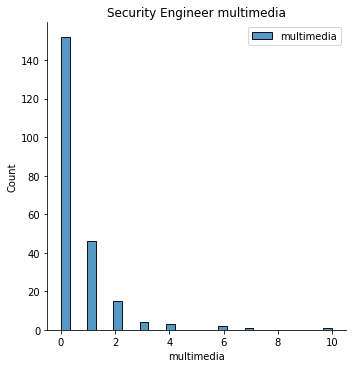

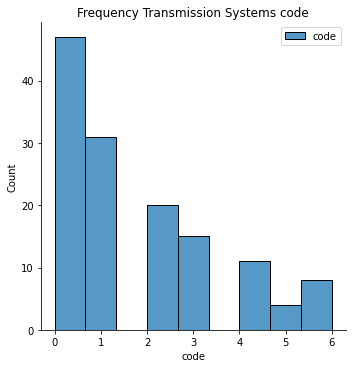

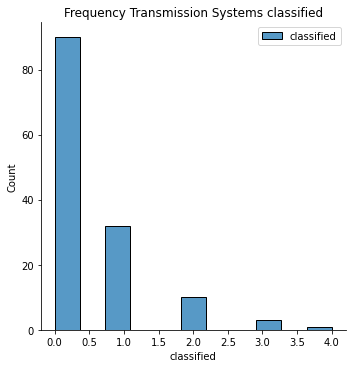

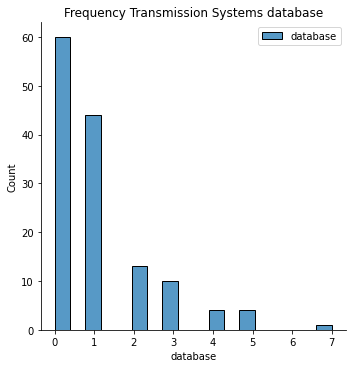

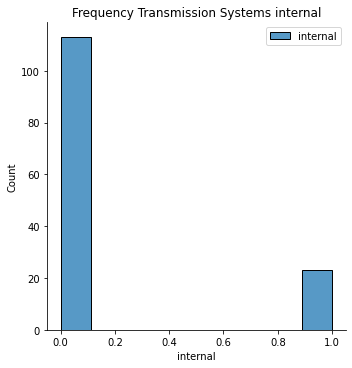

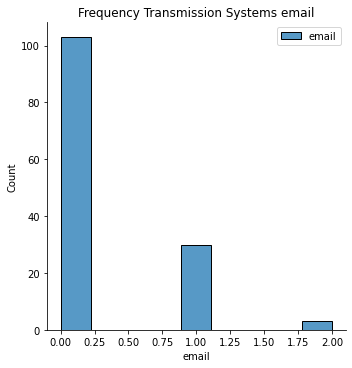

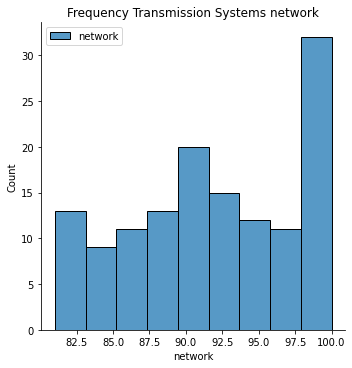

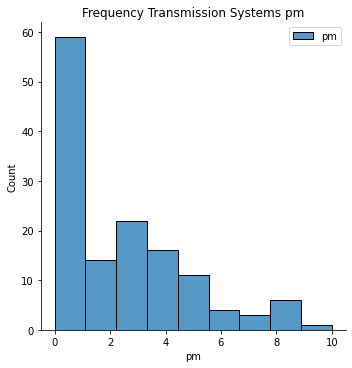

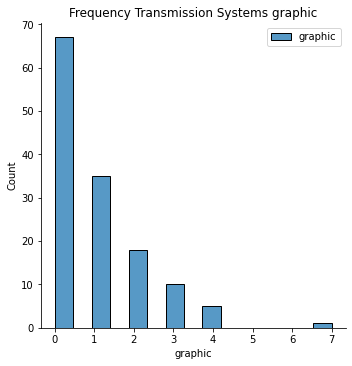

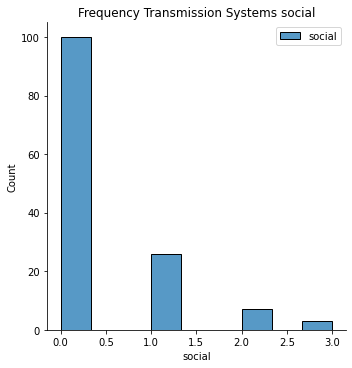

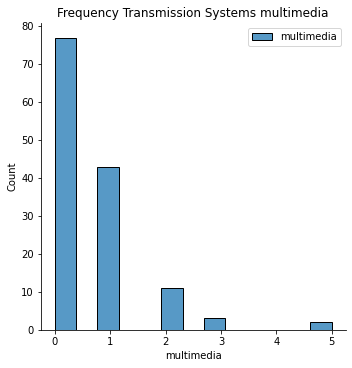

In [202]:
# For each role, plot the distribution of each column in the dataframe
for role in df.role.unique():
    for col in df.columns:
        if col != 'role' and col != 'name' and col != 'total' and col != 'id' and col != 'evaluation':
            sns.displot(df[df.role == role][col], label=col)
            plt.title(role + ' ' + col)
            plt.legend()
            plt.show()

In [203]:
df.head()

,name,id,role,code,classified,database,internal,email,network,pm,graphic,social,multimedia,evaluation
0,Aaden,1,Software Engineer,17,28,5,16.0,8,13,7,2,0,4,-1
1,Oscar,2,Software Engineer,43,0,12,12.0,3,17,0,7,0,6,1
2,Aarav,3,Software Engineer,59,1,11,0.0,3,14,6,3,0,3,1
3,Amber,4,Software Engineer,44,2,12,28.0,5,2,0,7,0,0,1
4,Aaron,5,Software Engineer,49,0,16,10.0,2,16,2,5,0,0,1


In [216]:
df.isnull().sum()
df.fillna(0, inplace=True)

In [217]:
df.isnull().sum()

name          0
id            0
role          0
code          0
classified    0
database      0
internal      0
email         0
network       0
pm            0
graphic       0
social        0
multimedia    0
evaluation    0
dtype: int64

In [218]:
all_roles_df = []
role_str = []
for role in df.role.unique():
    all_roles_df.append(df[df.role == role])
    role_str.append(role)

print(role_str)

['Software Engineer', 'Intelligence Officer', 'Project Manager', 'Designer', 'Security Engineer', 'Frequency Transmission Systems']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


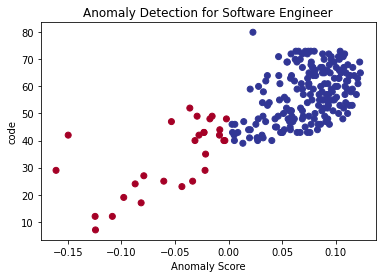

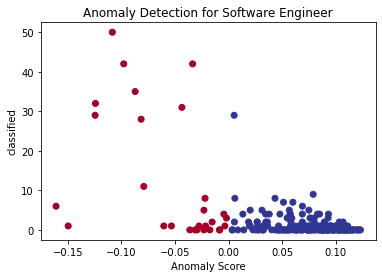

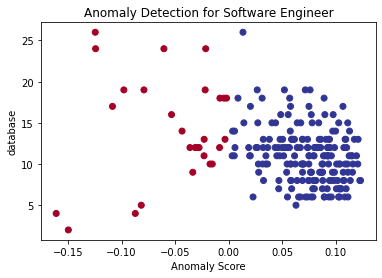

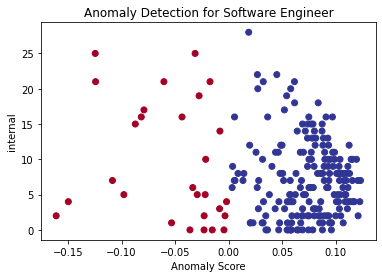

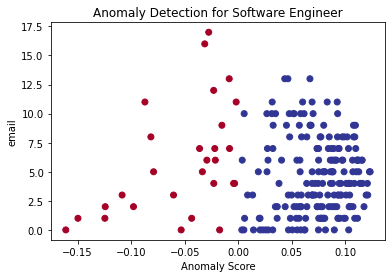

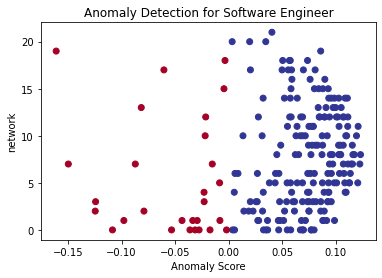

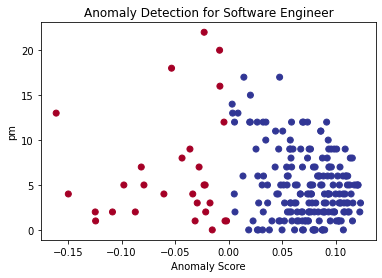

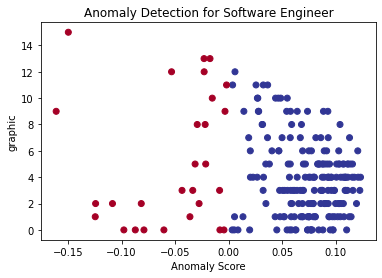

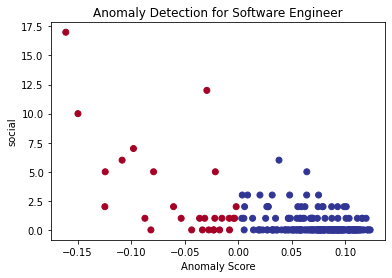

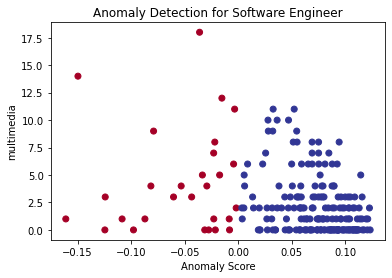

Count for role: Software Engineer
 1    194
-1     28
Name: anomaly, dtype: int64
 1    207
-1     15
Name: evaluation, dtype: int64
[[ 14  14]
 [  1 193]]
0.9324324324324325
False Positive Rate
0.06763285024154589
False Negative Rate
0.06666666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


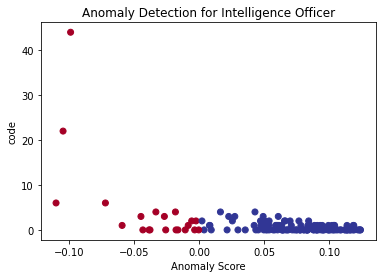

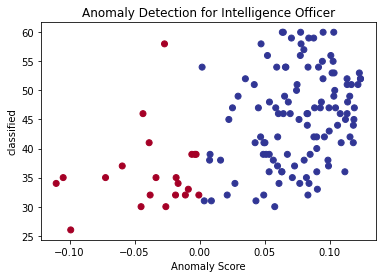

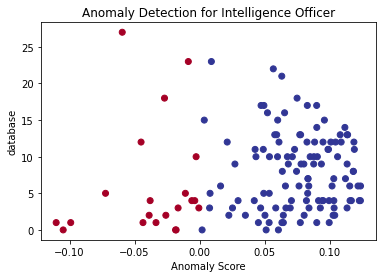

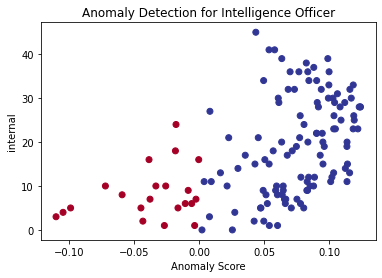

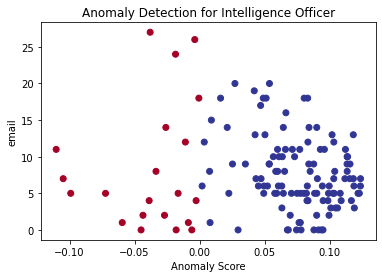

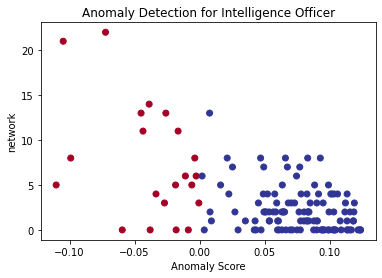

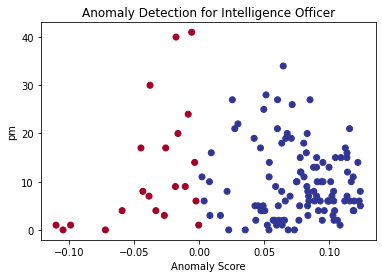

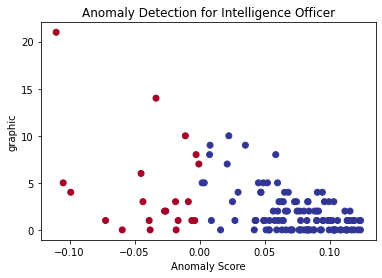

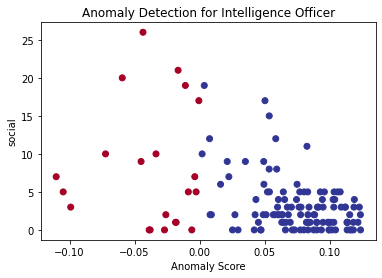

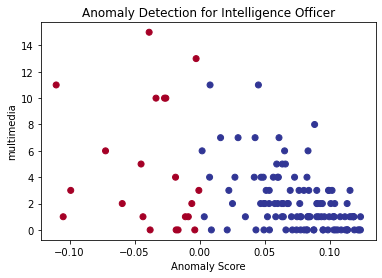

Count for role: Intelligence Officer
 1    113
-1     21
Name: anomaly, dtype: int64
 1    132
-1      2
Name: evaluation, dtype: int64
[[  2  19]
 [  0 113]]
0.8582089552238806
False Positive Rate
0.14393939393939395
False Negative Rate
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


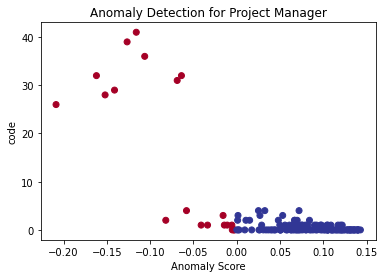

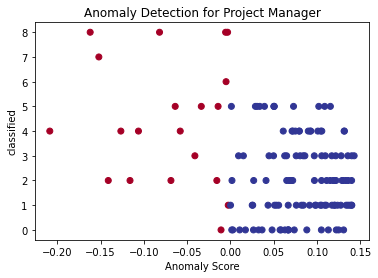

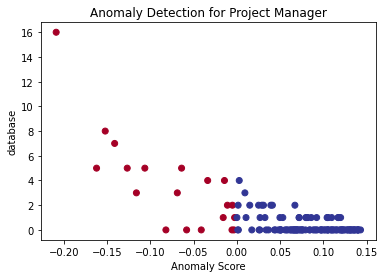

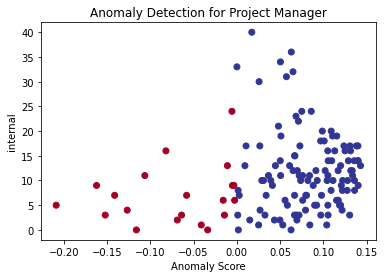

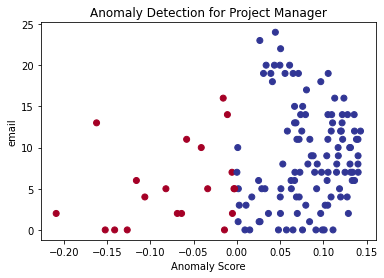

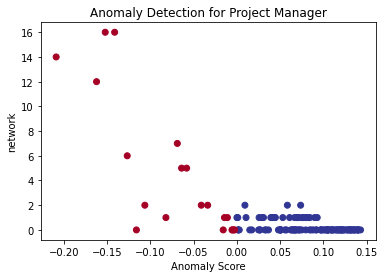

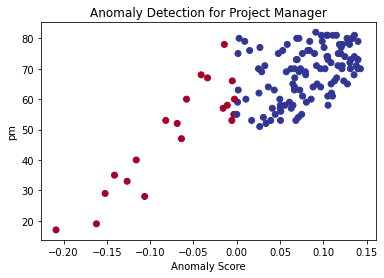

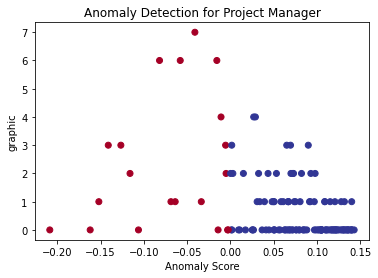

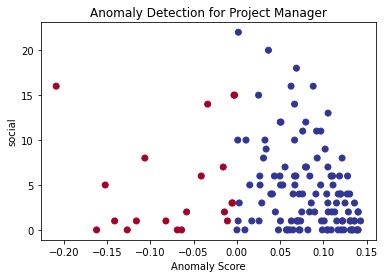

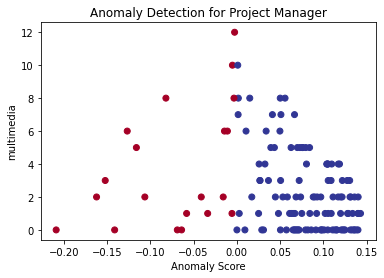

Count for role: Project Manager
 1    115
-1     20
Name: anomaly, dtype: int64
 1    126
-1      9
Name: evaluation, dtype: int64
[[  9  11]
 [  0 115]]
0.9185185185185185
False Positive Rate
0.0873015873015873
False Negative Rate
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


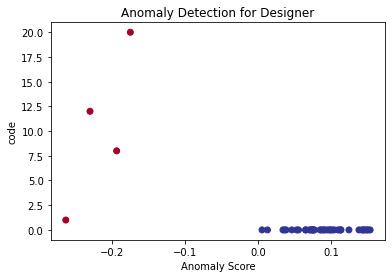

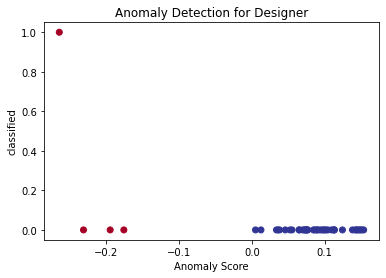

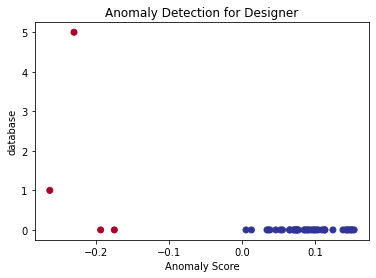

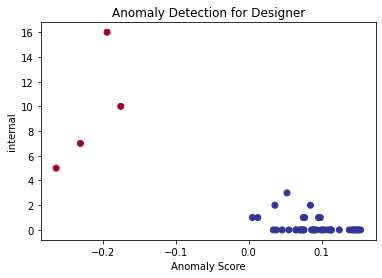

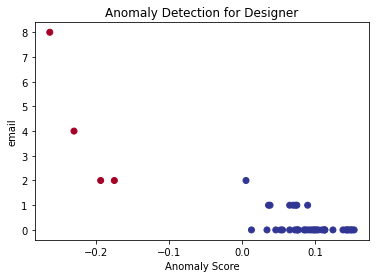

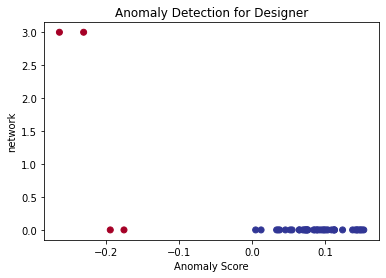

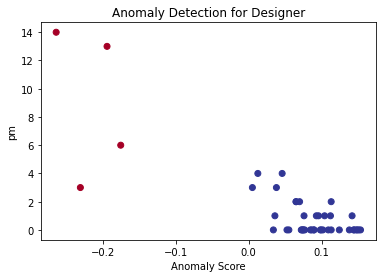

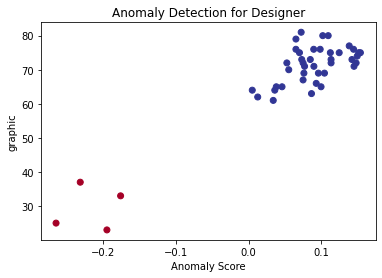

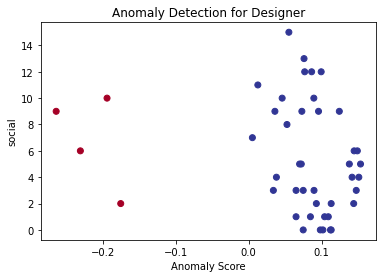

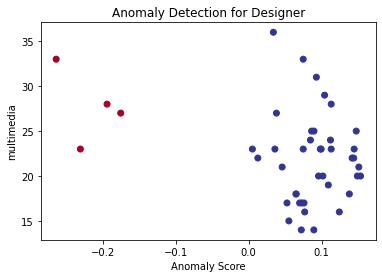

Count for role: Designer
 1    40
-1     4
Name: anomaly, dtype: int64
 1    40
-1     4
Name: evaluation, dtype: int64
[[ 4  0]
 [ 0 40]]
1.0
False Positive Rate
0.0
False Negative Rate
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


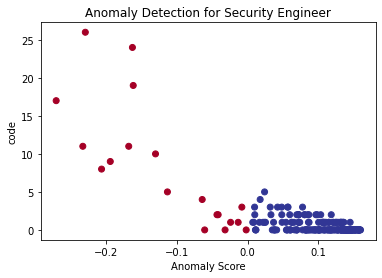

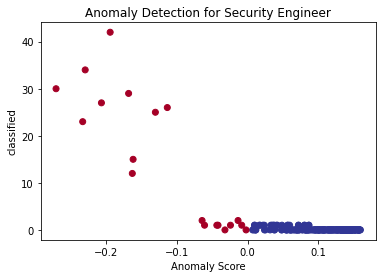

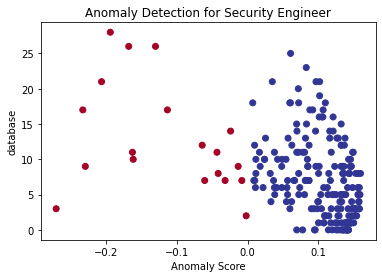

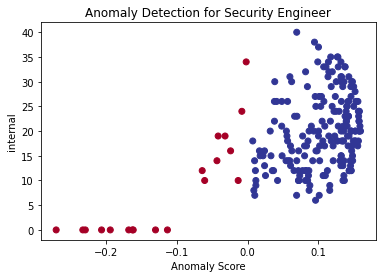

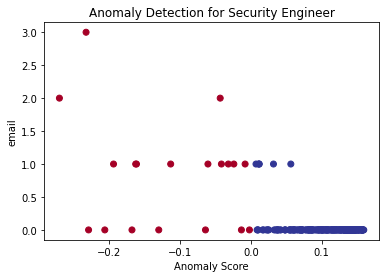

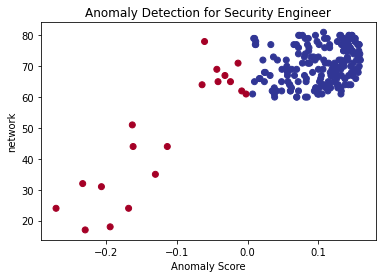

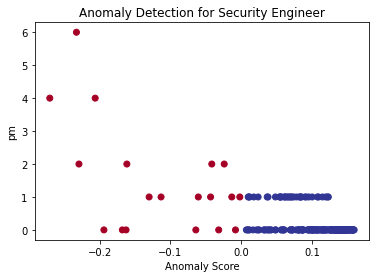

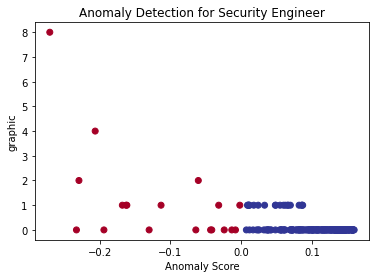

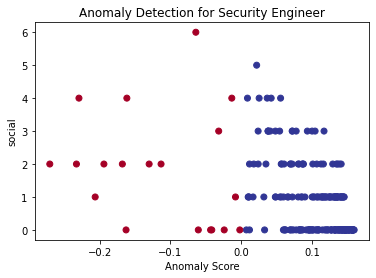

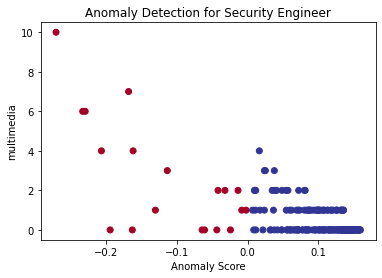

Count for role: Security Engineer
 1    205
-1     19
Name: anomaly, dtype: int64
 1    214
-1     10
Name: evaluation, dtype: int64
[[ 10   9]
 [  0 205]]
0.9598214285714286
False Positive Rate
0.04205607476635514
False Negative Rate
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


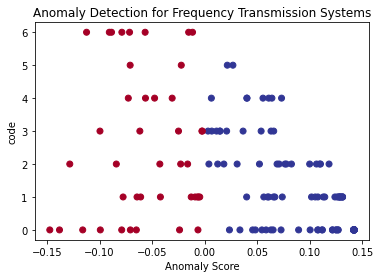

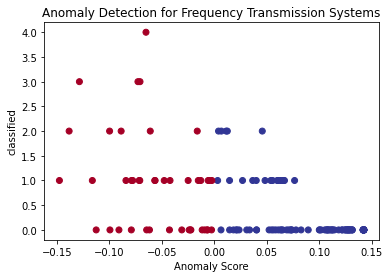

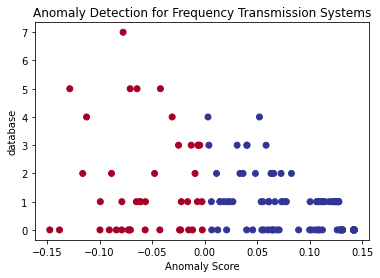

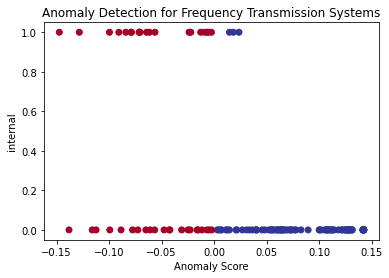

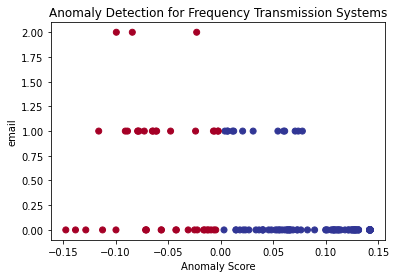

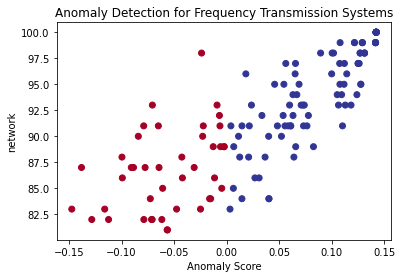

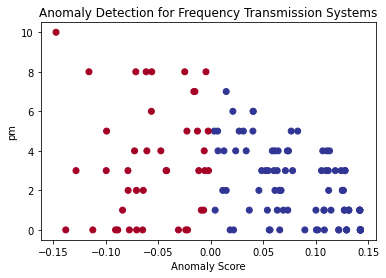

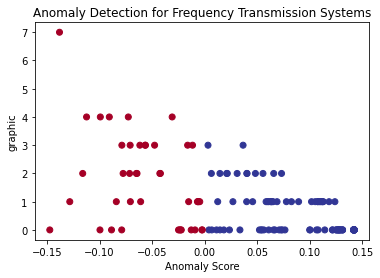

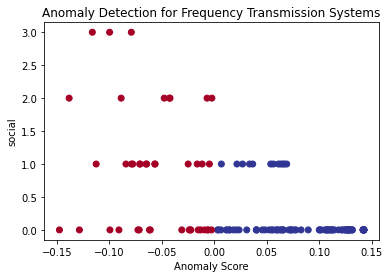

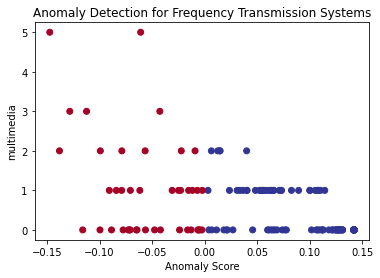

Count for role: Frequency Transmission Systems
 1    94
-1    42
Name: anomaly, dtype: int64
1    136
Name: evaluation, dtype: int64
[[ 0 42]
 [ 0 94]]
0.6911764705882353
False Positive Rate
0.3088235294117647
False Negative Rate
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars


In [220]:
it = 0
accuracies = []
matrices = []
fpr = []
fnr = []
for each_role_df in all_roles_df:
    model = IsolationForest(n_estimators=256, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
    model.fit(each_role_df[['code', 'database', 'network', 'graphic', 'email', 'internal', 'pm', 'multimedia', 'classified', 'social']])
    each_role_df['anomaly_score'] = model.decision_function(each_role_df[['code', 'database', 'network', 'graphic', 'email', 'internal', 'pm', 'multimedia', 'classified', 'social']])
    each_role_df['anomaly'] = model.predict(each_role_df[['code', 'database', 'network', 'graphic', 'email', 'internal', 'pm', 'multimedia', 'classified', 'social']])
    for col in each_role_df.columns:
        if col != 'name' and col != 'id' and col != 'role' and col != "anomaly_score" and col != "evaluation" and col != "anomaly":
            plt.scatter(each_role_df.anomaly_score, each_role_df[col], c=each_role_df.anomaly, cmap='RdYlBu')
            plt.ylabel(col)
            plt.xlabel('Anomaly Score')
            plt.title('Anomaly Detection for ' + role_str[it])
            plt.show()
    print("Count for role: " + role_str[it])
    print(each_role_df.anomaly.value_counts())
    print(each_role_df.evaluation.value_counts())
    matrix = confusion_matrix(each_role_df.anomaly, each_role_df.evaluation)
    matrices.append(matrix)
    print(matrix)
    # Print the accuracy
    accuracies.append(np.trace(matrix) / np.sum(matrix))
    print(np.trace(matrix) / np.sum(matrix))
    print("False Positive Rate")
    print(matrix[0][1] / (matrix[0][1] + matrix[1][1]))
    fpr.append(matrix[0][1] / (matrix[0][1] + matrix[1][1]))
    print("False Negative Rate")
    fnr.append(matrix[1][0] / (matrix[0][0] + matrix[1][0]))
    print(matrix[1][0] / (matrix[0][0] + matrix[1][0]))
    it += 1

In [224]:
tp = 0
fp = 0
fn = 0
tn = 0
for each_matrix in matrices:
    tp += each_matrix[0][0]
    fp += each_matrix[0][1]
    fn += each_matrix[1][0]
    tn += each_matrix[1][1]
print("True Positive: ", tp)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Negative: ", tn)


True Positive:  39
False Positive:  95
False Negative:  1
True Negative:  760


In [226]:
# Final Summary:
print("False Positive Rate")
print(fp / (fp + tn))
print("False Negative Rate")
print(fn / (tp + fn))

False Positive Rate
0.1111111111111111
False Negative Rate
0.025
